<a href="https://colab.research.google.com/github/mehular0ra/Pytorch-Tutorial/blob/main/Pytorch_Linear_Regression_(Moore's_Law).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-03-19 11:10:11--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-03-19 11:10:11 (48.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
# load the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)

(162, 1) (162, 1)


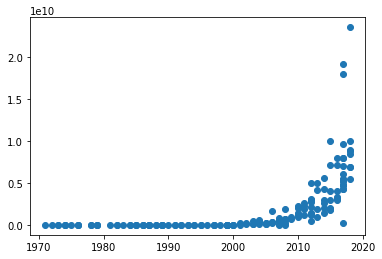

In [ ]:
# plot the data: it is exponential!
plt.scatter(X, Y);

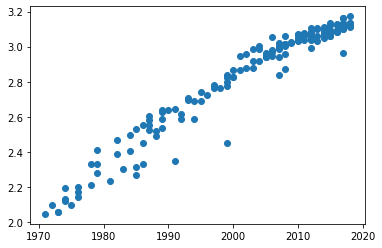

In [ ]:
# to make a linear model, take log
Y = np.log(Y)
plt.scatter(X, Y);

In [ ]:
# normalize the values
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy

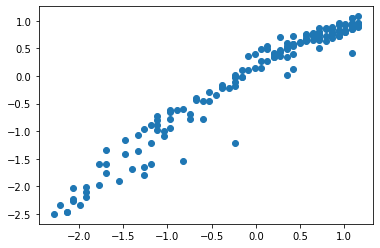

In [ ]:
plt.scatter(X, Y);

In [ ]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
# Linear Model
model = nn.Linear(1, 1)

In [ ]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.7)

In [ ]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [ ]:
# number of iterations
n_epochs = 100

# list to store the losses
losses = []

for it in range(n_epochs):
    # set the gradients to zero
    optimizer.zero_grad()

    # forward propagation
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # save the loss in the losses list
    # .item() fn to convert from pytorch to normal to python 
    # .numpy() not used because loss is not a list/array
    losses.append(loss.item())

    # backward propagation
    loss.backward()

    # go to next step now
    optimizer.step()

    # print the epoch and error
    print(f"Epoch: {it+1}/{n_epochs}, Error: {loss}")


Epoch: 1/100, Error: 0.05300479382276535
Epoch: 2/100, Error: 0.0529896542429924
Epoch: 3/100, Error: 0.05299511179327965
Epoch: 4/100, Error: 0.053003303706645966
Epoch: 5/100, Error: 0.05300486460328102
Epoch: 6/100, Error: 0.05300028994679451
Epoch: 7/100, Error: 0.05299430340528488
Epoch: 8/100, Error: 0.05299052968621254
Epoch: 9/100, Error: 0.052989594638347626
Epoch: 10/100, Error: 0.052990205585956573
Epoch: 11/100, Error: 0.0529908612370491
Epoch: 12/100, Error: 0.05299089476466179
Epoch: 13/100, Error: 0.05299043655395508
Epoch: 14/100, Error: 0.052989937365055084
Epoch: 15/100, Error: 0.052989646792411804
Epoch: 16/100, Error: 0.052989594638347626
Epoch: 17/100, Error: 0.0529896579682827
Epoch: 18/100, Error: 0.052989713847637177
Epoch: 19/100, Error: 0.05298970639705658
Epoch: 20/100, Error: 0.0529896542429924
Epoch: 21/100, Error: 0.05298962444067001
Epoch: 22/100, Error: 0.052989594638347626
Epoch: 23/100, Error: 0.05298960208892822
Epoch: 24/100, Error: 0.052989602088928

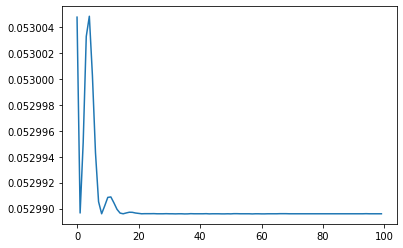

In [ ]:
# plot the losses at each epoch
plt.plot(losses);

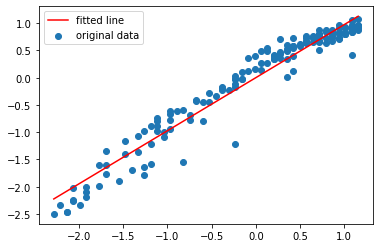

In [ ]:
# plot the function
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='original data')
plt.plot(X, predicted, label='fitted line', color='red')
plt.legend()
plt.show()

In [ ]:
w = model.weight.data.numpy()
print(w)

[[0.9731446]]


In [ ]:
# to find the value of a
a = w[0, 0] * sy / sx
print(a)

0.30623518731553756


In [ ]:
# time take to double the transistors
delTime = np.log(2) / a
print(f'Time taken double the transistors on the board of same size is: {delTime:.2f} years.')

Time taken double the transistors on the board of same size is: 2.26 years.


# Exercise

What happens when you *don't* normalize the data?

This makes it easier because you no longer need to do the transformation step.

But what happens to the optimization? Can you use the same learning rate as we did originally?

In [ ]:
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)

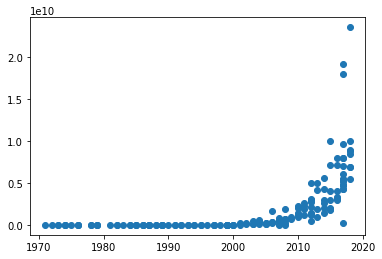

In [ ]:
plt.scatter(X, Y);

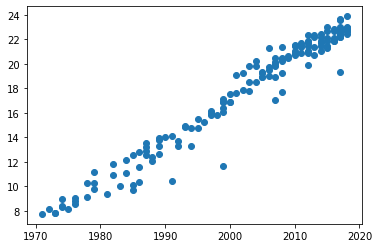

In [ ]:
# to make a linear model, take log
Y = np.log(Y)
plt.scatter(X, Y);

In [ ]:
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
# Linear Model
model = nn.Linear(1, 1)

In [ ]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [ ]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [ ]:
# number of iterations
n_epochs = 30

# list to store the losses
losses = []

for it in range(n_epochs):
    # set the gradients to zero
    optimizer.zero_grad()

    # forward propagation
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # save the loss in the losses list
    # .item() fn to convert from pytorch to normal to python 
    # .numpy() not used because loss is not a list/array
    losses.append(loss.item())

    # backward propagation
    loss.backward()

    # go to next step now
    optimizer.step()

    # print the epoch and error
    print(f"Epoch: {it+1}/{n_epochs}, Error: {loss}")


Epoch: 1/30, Error: nan
Epoch: 2/30, Error: nan
Epoch: 3/30, Error: nan
Epoch: 4/30, Error: nan
Epoch: 5/30, Error: nan
Epoch: 6/30, Error: nan
Epoch: 7/30, Error: nan
Epoch: 8/30, Error: nan
Epoch: 9/30, Error: nan
Epoch: 10/30, Error: nan
Epoch: 11/30, Error: nan
Epoch: 12/30, Error: nan
Epoch: 13/30, Error: nan
Epoch: 14/30, Error: nan
Epoch: 15/30, Error: nan
Epoch: 16/30, Error: nan
Epoch: 17/30, Error: nan
Epoch: 18/30, Error: nan
Epoch: 19/30, Error: nan
Epoch: 20/30, Error: nan
Epoch: 21/30, Error: nan
Epoch: 22/30, Error: nan
Epoch: 23/30, Error: nan
Epoch: 24/30, Error: nan
Epoch: 25/30, Error: nan
Epoch: 26/30, Error: nan
Epoch: 27/30, Error: nan
Epoch: 28/30, Error: nan
Epoch: 29/30, Error: nan
Epoch: 30/30, Error: nan


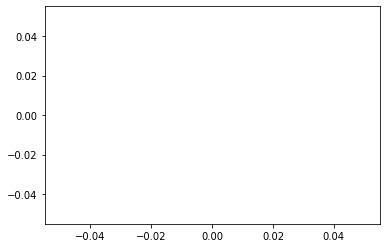

In [ ]:
# plot the losses at each epoch
plt.plot(losses);